In [1]:
pickle_fn = 'number-leaves-experiment-article.pickle'

In [2]:
from experiment import Experiment
import pickle
from joblib import Parallel, delayed, parallel_backend
import matplotlib.pyplot as plt
from analysis import load_experiments, tabulate_results, extract_constants, \
mean_normalised_rf_to_optimum, topological_accuracy_report, likelihood_report
import numpy as np

In [3]:
tree_samples = 10
leaves = [5, 10, 15, 30, 40, 50, 75, 100]
sequence_samples = 4

with parallel_backend('loky', n_jobs=96):
    experiments = Parallel(max_nbytes=None)(
            delayed(Experiment)(
                tree_seed=tree_seed,
                num_leaves=num_leaves,
                min_length=0.05,
                max_length=0.2,
                sequence_length=200,
                sequence_seed=sequence_seed,
                dimension=30,
                rho=0.5,
                logalike_hyperparams=dict(lr=0.1, max_step_size=0.05, stopping_distance=5e-5, max_rounds=100000),
                haggl_hyperparams=dict(),
                mds_hyperparams=dict(),
            )
        for tree_seed in range(tree_samples)
        for sequence_seed in range(sequence_samples)
        for num_leaves in leaves
    )
    
    experiments = Parallel(max_nbytes=None)(
            delayed(Experiment.evaluate_method)(experiment, experiment.logalike)
            for experiment in experiments)
        
    experiments = Parallel(max_nbytes=None)(
            delayed(Experiment.evaluate_method)(experiment, experiment.weighbor)
            for experiment in experiments)
    
    experiments = Parallel(max_nbytes=None)(
            delayed(Experiment.evaluate_method)(experiment, experiment.bionj)
            for experiment in experiments)
    
    experiments = Parallel(max_nbytes=None)(
            delayed(Experiment.evaluate_method)(experiment, experiment.nj)
            for experiment in experiments)
    

In [4]:
with open(pickle_fn, 'wb') as f:
    pickle.dump(experiments, f)

In [5]:
with open(pickle_fn, 'rb') as f:
    experiments = pickle.load(f)

In [6]:
gbcol = 'num_leaves'

experiments = load_experiments(pickle_fn)
df = tabulate_results(experiments)
extract_constants(df)

min_length         0.05
max_length          0.2
sequence_length     200
dimension            30
rho                 0.5
weighbor_meta      None
bionj_meta         None
nj_meta            None
Name: 0, dtype: object

In [7]:
figsize = (4.3, 4.3)

# w.r.t. the likelihood of the trees inferred

... i.e. how often does the inferred tree have a likelihood at least as high as that of the generating tree?

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


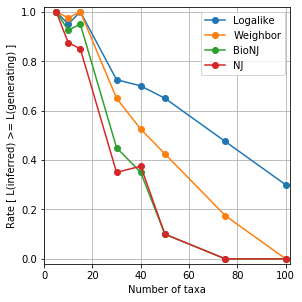

In [8]:
llr = likelihood_report(df, gbcol, tolerance=0)
llr.plot(marker='o', figsize=figsize)
plt.ylim(-0.02, 1.02)
plt.xlim(0, 102)
plt.xlabel('Number of taxa')
plt.ylabel('Rate [ L(inferred) >= L(generating) ]')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('article/number-of-leaves-likelihood-wrt-generating-article.eps')
plt.show()

# Mean RF distance to optimum

Lower values are better.

In [9]:
mnrf = mean_normalised_rf_to_optimum(df, gbcol)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


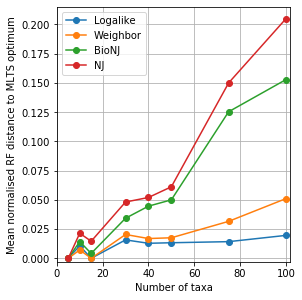

In [10]:
mnrf.plot(marker='o', figsize=figsize)
plt.grid()
plt.ylabel('Mean normalised RF distance to MLTS optimum')
plt.xlabel('Number of taxa')
plt.xlim(0, 102)
plt.ylim(-0.003)
plt.tight_layout()
plt.savefig('article/number-of-leaves-rf-to-optimum-article.eps')
plt.show()

# Mean topological accuracy

Higher values are better.

In [11]:
tar = topological_accuracy_report(df, gbcol)
tar

,Logalike,Weighbor,BioNJ,NJ
num_leaves,,,,
5,0.950,0.950,0.950,0.950
10,0.950,0.975,0.925,0.875
15,1.000,1.000,0.950,0.825
30,0.625,0.600,0.400,0.300
40,0.575,0.425,0.325,0.300
50,0.550,0.325,0.100,0.075
75,0.400,0.150,0.000,0.000
100,0.200,0.000,0.000,0.000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


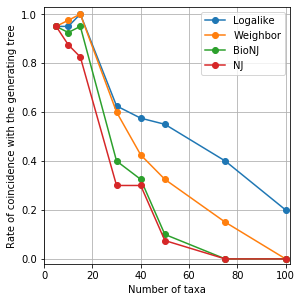

In [12]:
tar.plot(marker='o', figsize=figsize)
plt.grid()
plt.ylabel('Rate of coincidence with the generating tree')
plt.xlabel('Number of taxa')
plt.ylim(-0.02, 1.03)
plt.xlim(0, 102)

plt.tight_layout()
plt.savefig('article/number-of-leaves-topological-accuracy-article.eps')
plt.show()